In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

The function used for fitting is from:
Shih, Amy Y., et al. "Molecular dynamics simulations of discoidal bilayers assembled from truncated human lipoproteins." Biophysical journal 88.1 (2005): 548-556



https://doi.org/10.1529/biophysj.104.046896

In [2]:
def func(x, D, R):
    return R**2 * (1 - np.exp(-3.39 * D * x / R**2) )

In [3]:
def plot_residual(d, func, popt, name, rep):
    fig, ax = plt.subplots()
    res = d[:,1] - func(d[:,0],*popt)
    ax.plot(d[:,0],res)
    ax.grid()
    ax.set_ylabel('Residual')
    ax.set_xlabel('Time (ps)')
    ax.set_title('{0:s} Replica {1:s}'.format(name, rep))
    plt.savefig('{0:s}_v{1:s}_Diffusion_fit_residual.png'.format(name, rep), dpi = 600)
    plt.show()
    return

In [4]:
def plot_data_func(d, func, popt, name, rep):
    plt.plot(d[:,0], func(d[:,0], *popt), color = 'black', linewidth=2, label='function')
    plt.plot(d[:,0], d[:,1], color ='red', label='data')
    plt.grid()
    plt.ylabel('MSD')
    plt.xlabel('Time (ps)')
    plt.title('{0:s} Replica {1:s}'.format(name, rep))
    plt.legend(loc='best')
    plt.savefig('{0:s}_v{1:s}_Diffusion_func_data.png'.format(name, rep), dpi=600)
    plt.show()
    return

Name the systems in a list

In [5]:
systems = ['1D1_69', '1E3D1_134', '2N2_302','NW9_57','NW11_72','NW30_726']

Set guess estimates for the radius of the different discs

In [6]:
Radius_list = [4.85, 6.5, 8, 4.5, 5.5, 15]

Name the output files for saving the Diffusion coefficient

In [7]:
file_out = open('Diffusion_coefficient_radius.dat', 'w')
file_mean = open('Diffusion_coefficient_means.dat', 'w')

1D1_69
Diffusion
5.9034341617119566e-05


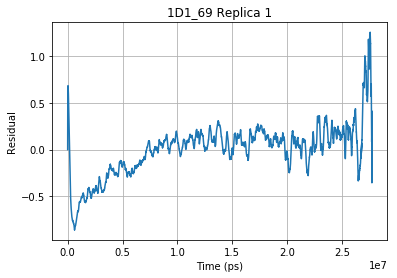

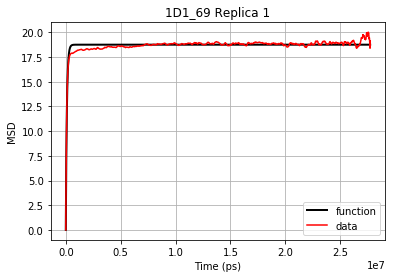

Diffusion
4.379656921919027e-05


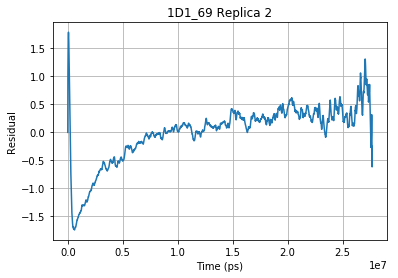

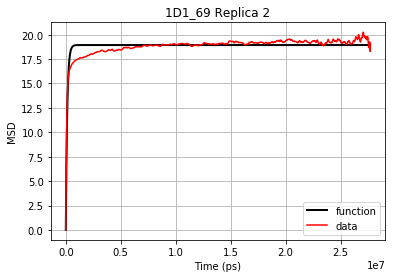

Diffusion
6.778851796925837e-05


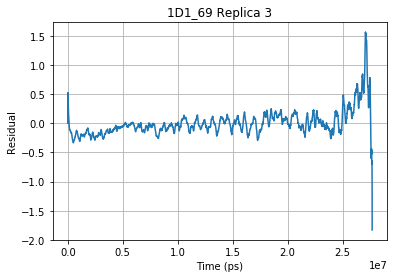

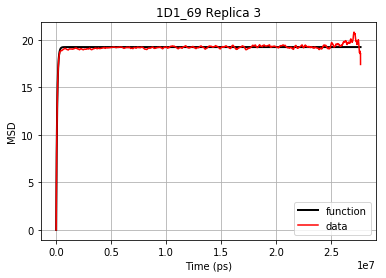

1E3D1_134
Diffusion
5.445346649491455e-05


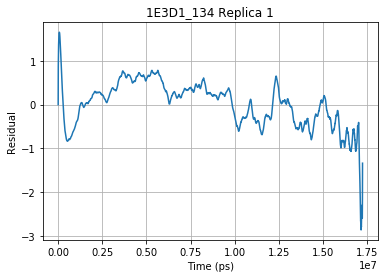

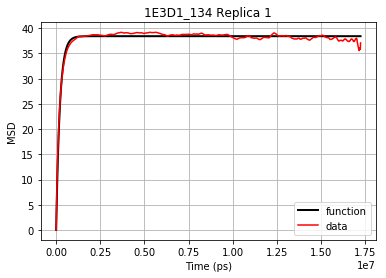

Diffusion
5.303574047030694e-05


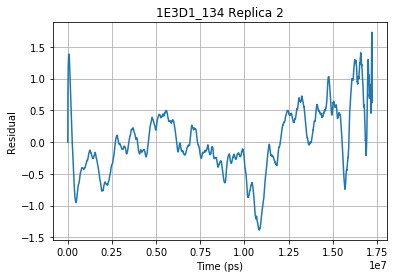

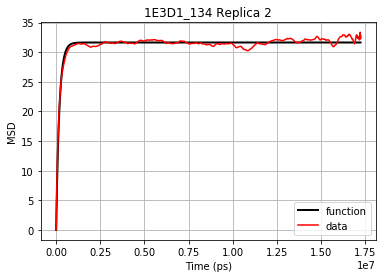

Diffusion
5.350127689113644e-05


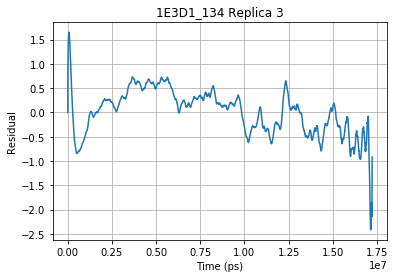

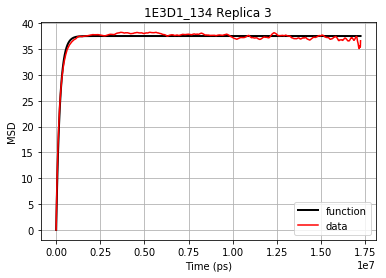

2N2_302
Diffusion
6.819700154570082e-05


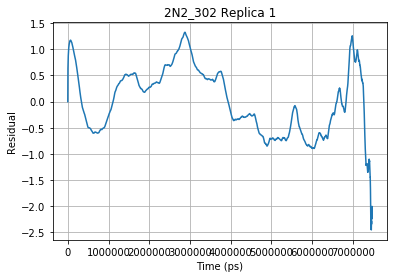

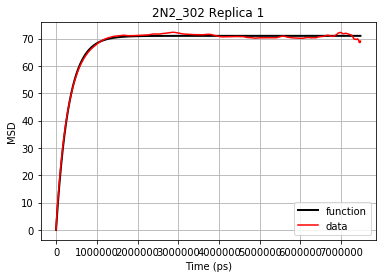

Diffusion
6.644967595396229e-05


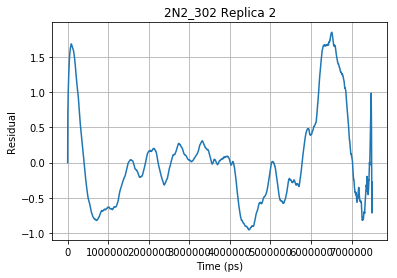

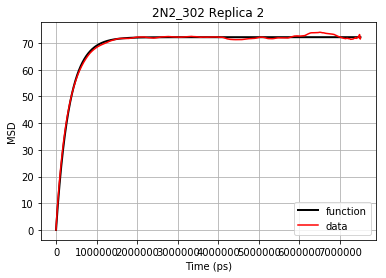

Diffusion
6.406184690751327e-05


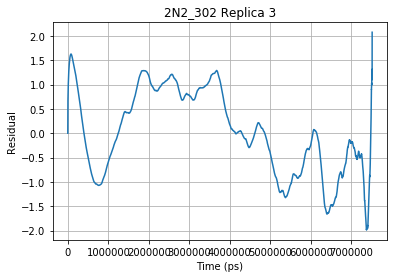

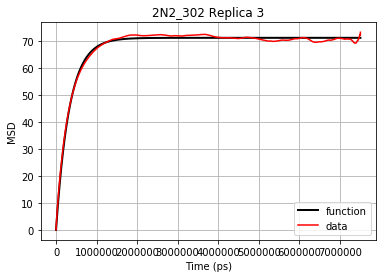

NW9_57
Diffusion
7.08304379579724e-05


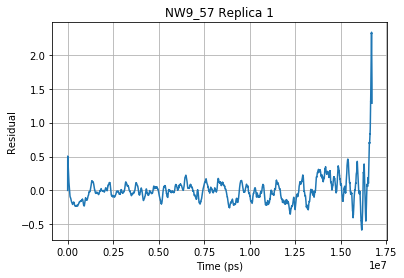

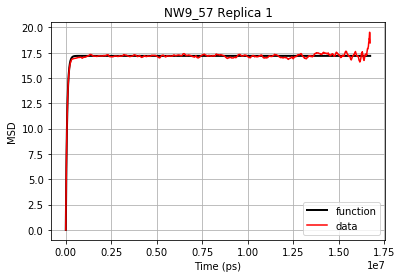

Diffusion
7.263056631503718e-05


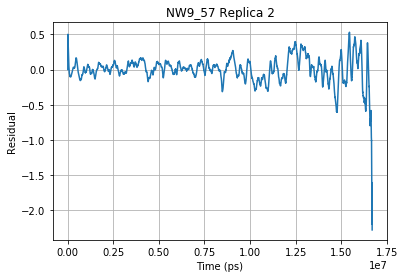

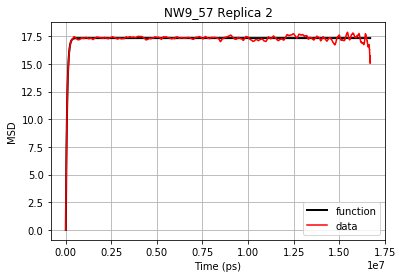

Diffusion
7.017643267209666e-05


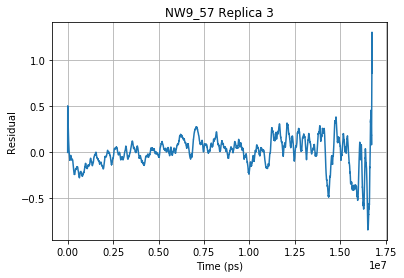

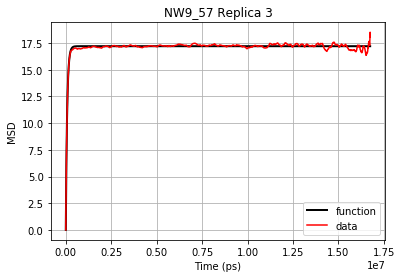

NW11_72
Diffusion
7.182516219413236e-05


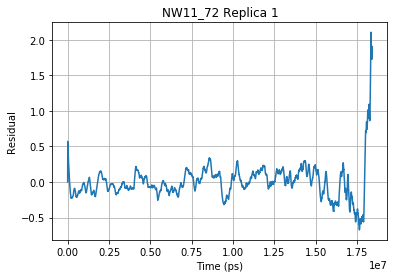

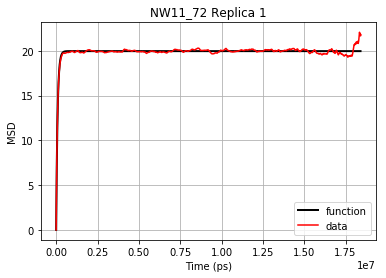

Diffusion
7.404646118363413e-05


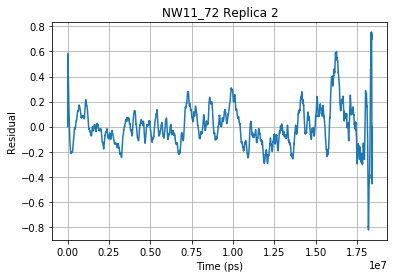

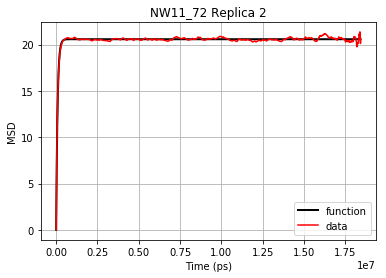

Diffusion
7.767788701831612e-05


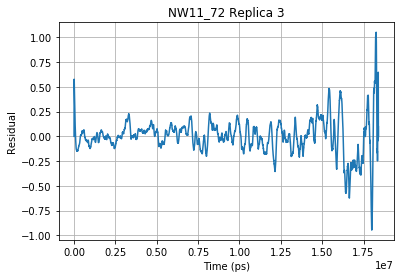

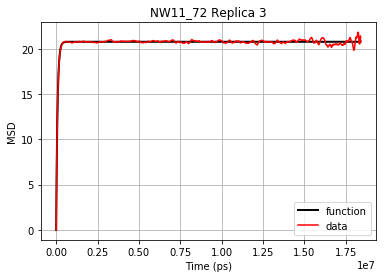

NW30_726
Diffusion
3.2915953861814214e-05


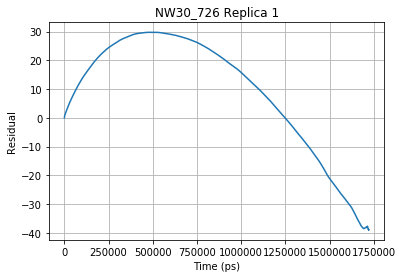

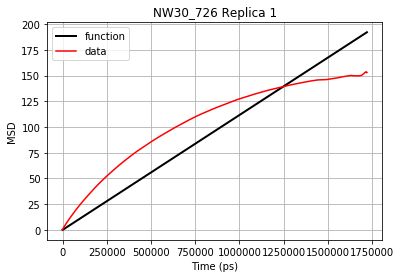

Diffusion
3.182874461279455e-05


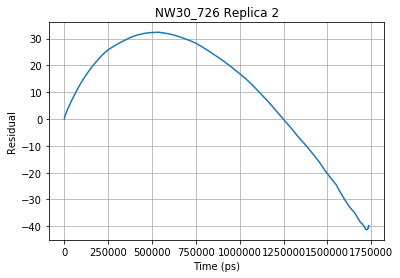

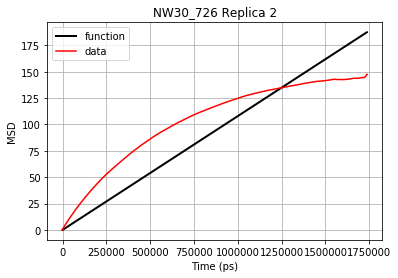

Diffusion
3.1866010025385235e-05


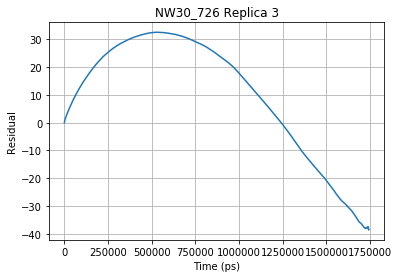

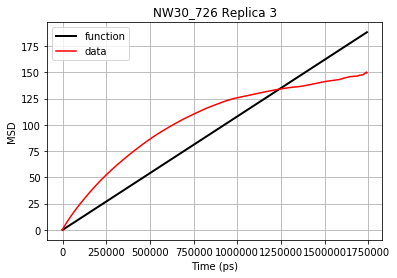

In [8]:
M = []
S = [] 
for idx, s in enumerate(systems): 
    name = s
    print (name)
    R = Radius_list[idx]
    local_array = np.zeros([3])
    for r in range(1,4):
        rep='{0:d}'.format(r)
        d = np.loadtxt('{0:s}_v{1:s}_nowat_PO4_msd.xvg'.format(name, rep), comments=('#','@'))
        popt, pcov = curve_fit(func, d[:,0], d[:,1],p0=[ 1e-6, Radius_list[idx] ])
        Diffusion_coeff, Radius = popt.ravel()
        print ('Diffusion')
        print (Diffusion_coeff)
        plot_residual(d, func, popt, name, rep)
        plot_data_func(d, func, popt, name, rep)
        file_out.write('{0:s} replica {1:s}\n'.format(name, rep))
        file_out.write('Diffusion Coeffcient in nm²/ µs\n')
        file_out.write('{0:.5f}\n'.format(Diffusion_coeff * 10**6))
        file_out.write('Radius in nm of the bilayer patch\n')
        file_out.write('{0:.5f}\n'.format(Radius))
        file_out.write('\n')
        file_out.flush()
        
        local_array[r-1] = Diffusion_coeff * 10**6
    mean_coeff = np.average(local_array)
    std_coeff  = np.std(local_array)
    M.append(mean_coeff)
    S.append(std_coeff)
    file_mean.write('{0:s}\n'.format(name))
    file_mean.write('Mean Diffusion Coefficient in  nm²/ µs\n')
    file_mean.write('{0:f}\n'.format(mean_coeff))
    file_mean.write('Std\n')
    file_mean.write('{0:f}\n'.format(np.std(local_array)))
    file_mean.write('\n')
    file_mean.flush()

file_out.close()
file_mean.close()

In [9]:
name = '1D1_69'
print (name)
local_array = np.zeros([3])
for r in range(1,4):
    rep='{0:d}'.format(r)
    d = np.loadtxt('{0:s}_v{1:s}_nowat_PO4_msd.xvg'.format(name, rep), comments=('#','@'))
    popt, pcov = curve_fit(func, d[:,0], d[:,1],p0=[ 1e-6, 6.2 ], bounds=((1e-6, 6e-5), (5, 7)) )
    Diffusion_coeff, Radius = popt.ravel()
    print 'Replica', rep
    print 'Diffusion Coefficient\n', Diffusion_coeff
    #print 'Radius\n', Radius
    local_array[r-1] = Diffusion_coeff * 10**6

1D1_69
Replica 1
Diffusion Coefficient
5.903553590562773e-05
Replica 2
Diffusion Coefficient
4.3798867048131734e-05
Replica 3
Diffusion Coefficient
6.778885698171199e-05


Set the labels for the boxplot

In [10]:
label_list=('1D1 #69 POPC\n Non-circularized \n(~9.7 nm)','1E3D1 #134 POPC\n Non-circularized\n(~13 nm)','2N2 #302 POPC\n Non-circularized\n (~16-18 nm)', \
        'NW9 #54 POPC\n Circularized \n(~9 nm)', 'NW11 #70 POPC\n Circularized \n(~11 nm)','NW30 #726 POPC\n Circularized \n(~30 nm)')

Choose which systems to plot. 
Remember to change the labels accordingly

In [11]:
D = systems[:-1]
mean = M[:-1]
std = S[:-1]
labels = label_list[:-1]

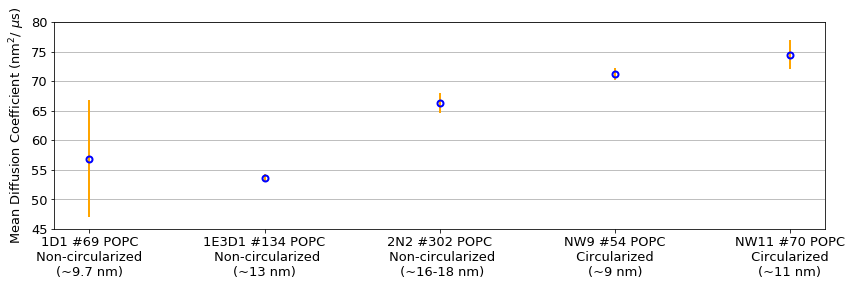

In [12]:
plt.figure(figsize=(12,4))
plt.errorbar(range(len(D)), mean, yerr=std, fmt='o', fillstyle='none', ecolor='orange',markeredgewidth=2,  mec='blue', linewidth=2)
plt.xticks(range(len(D)), labels, fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True, axis='y')
plt.ylabel('Mean Diffusion Coefficient (nm$^2$/ $\mu$s)', fontsize=13)
plt.tight_layout()
plt.ylim(45,80)
plt.savefig('Mean_STD_diffusion_coefficient_All_systems.png', dpi=600)

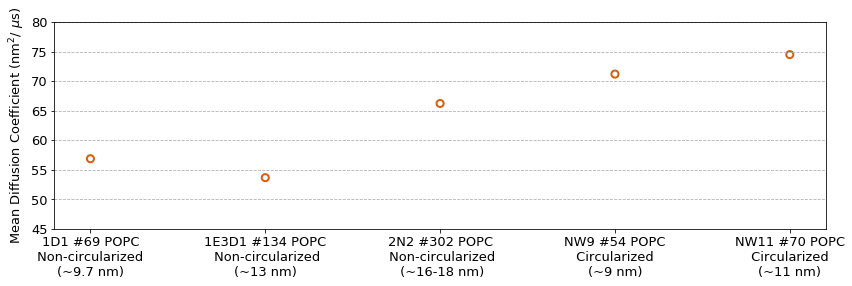

In [13]:
plt.figure(figsize=(12,4))
plt.grid(True, axis='y', linestyle='--')
plt.scatter(range(len(D)), mean, s=50, facecolors='none', edgecolor='#d95f0e', linewidth=2)
plt.xticks(range(len(D)), labels, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Mean Diffusion Coefficient (nm$^2$/ $\mu$s)', fontsize=13)
plt.tight_layout()
plt.ylim(45,80)
plt.savefig('Mean_diffusion_coefficient_All_systems.png', dpi=600)